In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## The Matching Problem ##

This famous problem has been stated variously in terms of hats and people, letters and envelopes, tea cups and saucers – indeed, any situation in which you might want to match two kinds of items seems to have appeared somewhere as a setting for the matching problem. 

In the letter-envelope setting there are $n$ letters labeled 1 through $n$ and also $n$ envelopes labeled 1 through $n$. The letters are permuted randomly into the envelopes, one letter per envelope (a mishap usually blamed on an unfortunate hypothetical secretary), so that all permutations are equally likely. The main questions are about the number of letters that are placed into their matching envelopes.

"Real life" settings aside, the problem is about the number of fixed points of a random permutation. A fixed point is an element whose position is unchanged by the shuffle.

### Matches at Fixed Locations ###
Consider a random permutation of $n$ elements which for simplicity we will call $\{1, 2, \ldots , n\}$. For any $i$ in the range 1 through $n$, what is the chance that Position $i$ is a fixed point? In other words, what is the chance that letter $i$ falls in envelope $i$?

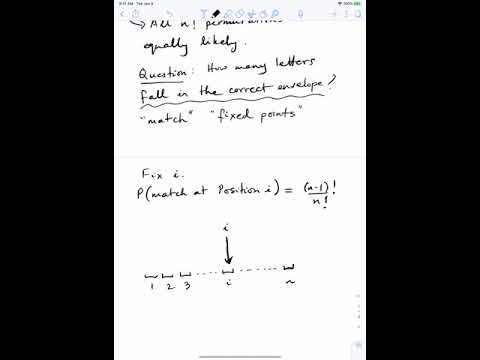

In [2]:
# VIDEO: Fixed Locations
from IPython.display import YouTubeVideo

YouTubeVideo("wM-DD_j2npE")

We know that there are $n!$ possible permutations, all of which are equally likely. To find $P(\text{match at Position }i)$ all we have to do is count the number of permutations that put letter $i$ in envelope $i$. Here is a good way to count these:
- Put letter $i$ in envelope $i$.
- Once that is done, the remaining $n-1$ letters can be permuted in $(n-1)!$ ways.

So

$$
P(\text{match at Position }i) = \frac{(n-1)!}{n!} 
= \frac{1}{n}
$$

Notice the absence of $i$ from the answer. No matter which position you fix, the chance of a match at that position is $1/n$. This formalizes the intuitive notion that each letter is equally likely to fall in any envelope, so the chance that it falls in the matching envelope is $1/n$.

Now fix any pair of positions $i \ne j$. To find $P(\text{matches at Positions } i \text{ and } j)$, extend the method we used above:
- Put letter $i$ in envelope $i$ and letter $j$ in envelope $j$.
- Once that is done, the remaining $n-2$ letters can be permuted in $(n-2)!$ ways.

So

$$
P(\text{matches at Positions } i \text{ and } j) = 
\frac{(n-2)!}{n!} 
= \frac{1}{n} \cdot \frac{1}{n-1}
$$

The second term in the product is 
$P(\text{match at } j \mid \text{match at } i)$ and is just the chance of a match at a fixed spot in the reduced set of $n-1$ letters after letter $i$ and envelope $i$ have been removed.

You should check by induction that for $k = 1, 2, \ldots , n$,

$$
P(\text{matches at a specified set of } k \text{ positions})
= \frac{1}{n} \cdot \frac{1}{n-1} \cdot \cdots \cdot \frac{1}{n-k+1}
$$

### No Matches ###
If letters falling in the right envelopes are good events, then the worst possible event is every letter falling in a wrong envelope. That is the event that there are no matches, and is called a *derangement*. Let's find the chance of a derangement.

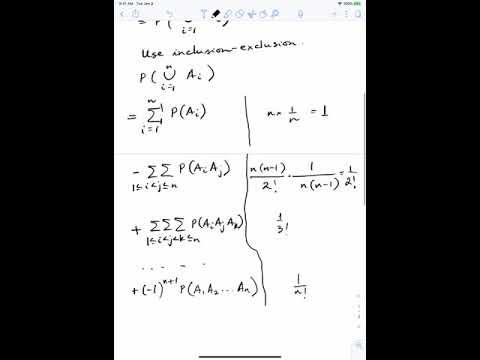

In [3]:
# VIDEO: Derangement
from IPython.display import YouTubeVideo

YouTubeVideo("PYp39ZsLxOg")

The key is to notice that the complement is a union, and then use the inclusion-exclusion formula.

$$
\begin{align*}P(\text{no match}) &= 1 - P(\text{at least one match}) \\
&= 1 - P\big{(}\bigcup_{i=1}^n \{\text{match at Position } i\} \big{)} \\
&= 1 - P\big{(}\bigcup_{i=1}^n A_i \big{)}
\end{align*}
$$

where $A_i$ is the event "match at Position $i$".

By the inclusion-exclusion formula and our calculations above,

$$
\begin{align*}
& P\big{(}\bigcup_{i=1}^n A_i \big{)} \\
&=
\sum_{i=1}^n P(A_i) - \mathop{\sum \sum}_{1 \le i < j \le n} P(A_iA_j) + \mathop{\sum \sum \sum}_{1 \le i < j < k \le n} P(A_iA_jA_j) - \cdots + (-1)^{n+1} P(A_1A_2 \ldots A_n) \\
&= \sum_{i=1}^n \frac{1}{n} - \mathop{\sum \sum}_{1 \le i < j \le n} \frac{1}{n} \cdot \frac{1}{n-1} + 
\mathop{\sum \sum \sum}_{1 \le i < j < k \le n}
\frac{1}{n} \cdot \frac{1}{n-1} \cdot \frac{1}{n-2} -
\cdots + (-1)^{n+1} \frac{1}{n!}
\end{align*}
$$

If those sums look hair-raising, look again. None of the terms being added has an index ($i$, $j$, etc) in it! Each sum consists of adding a constant value multiple times, and is therefore equal to the constant times the number of terms in the sum. 

The number of terms in the first sum is $n$. As we observed in an earlier section, the number of terms being added in the second sum is

$$
\frac{n(n-1)}{2!}
$$

In the third sum the number of terms is

$$
\frac{n(n-1)(n-2)}{3!}
$$

and so on. Therefore

$$
\begin{align*}
& P\big{(}\bigcup_{i=1}^n A_i \big{)} \\ \\
&= n \cdot \frac{1}{n}
~-~ \frac{n(n-1)}{2!} \cdot \frac{1}{n} \cdot \frac{1}{n-1}
~+~ \frac{n(n-1)(n-2)}{3!} \cdot \frac{1}{n} \cdot \frac{1}{n-1} \cdot \frac{1}{n-2} ~-~
\cdots + (-1)^{n+1} \frac{1}{n!} \\ \\
&= 1 - \frac{1}{2!} + \frac{1}{3!} - \cdots (-1)^{n+1}\frac{1}{n!}
\end{align*}
$$

Remember that

$$
P\big{(}\bigcup_{i=1}^n A_i \big{)} = 
P(\text{at least one match})
$$

So the chance of a derangement is

$$
\begin{align*}
P(\text{no match}) &= 1 - \big{(}1 - \frac{1}{2!} + \frac{1}{3!} - \cdots (-1)^{n+1}\frac{1}{n!}\big{)} \\
&= 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^n\frac{1}{n!} \\
&\sim e^{-1}
\end{align*}
$$

when $n$ is large.

In the language of random variables, let $M_n$ be the number of fixed points (matches) in a random permutation of $n$ elements. Then for every $n \ge 1$ we have an exact formula for the chance that $M_n$ is 0:

$$
P(M_n = 0) = 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^n\frac{1}{n!}
$$

For large $n$, we also have an approximation:

$$
P(M_n = 0) \sim e^{-1} = 36.8\%
$$

roughly. When $n$ is large, about 36.8% of all permutations of $n$ elements move all of the elements away from their original positions. 

### $k$ Matches ###
For $0 \le k \le n$, you can find $P(M_n = k)$ by using the following observations.

- There are $\binom{n}{k}$ ways of fixing the $k$ places for the matches.
- Once the places have been fixed, you have to get a match at those $k$ places; the chance of that is $1/(n(n-1) \cdots (n-k+1))$.
- Given that there are matches at those $k$ places, there are $n-k$ letters left, with the corresponding $n-k$ envelopes, and there has to be a derangement of these. The conditional chance is equal to $P(M_{n-k} = 0)$.

So for a fixed $k$ in the range $0 \le k \le n$,

$$
\begin{align*}
& P(M_n = k) \\
&= \binom{n}{k} \cdot \frac{1}{n(n-1) \cdots (n-k+1)} \cdot 
\big{(} 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)} \\
&= \frac{1}{k!} \cdot \big{(} 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)} \\
&\approx \frac{1}{k!} e^{-1} ~~~~~~~~~ \text{for large } n
\end{align*}
$$

We will see later that these probabilities form a *Poisson* distribution on the infinite set of non-negative integers.